# Weekend Problem-1

# Image Classification with Deep Learning

In [1]:
import keras 
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop

In [2]:
(xtrain,ytrain),(xtest,ytest)=fashion_mnist.load_data()
print("X-Train:",xtrain.shape)
print()
print("Y-Train:",ytrain.shape)
print()
print("X-Test:",xtest.shape)
print()
print("Y-Test:",ytest.shape)

4422102/4422102 [==============================] - 0s 0us/step
X-Train: (60000, 28, 28)

Y-Train: (60000,)

X-Test: (10000, 28, 28)

Y-Test: (10000,)


In [3]:
xtrain=xtrain.reshape(60000,28*28)
xtest=xtest.reshape(10000,28*28)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [4]:
xtrain=xtrain.astype('float32')
xtest=xtest.astype('float32')

In [5]:
xtrain=xtrain/255.
xtest=xtest/255.

In [6]:
import keras
num_classes=10
ytrain=keras.utils.to_categorical(ytrain,num_classes)
ytest=keras.utils.to_categorical(ytest,num_classes)

In [7]:
ytrain.shape

(60000, 10)

In [8]:
model=Sequential()
model.add(Dense(512,activation='relu',input_shape=(28*28,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(num_classes,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 932362 (3.56 MB)
Trainable params: 932362 (3.56 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [10]:
history=model.fit(xtrain,ytrain,
                 batch_size=128,
                 epochs=20,
                 verbose=2,
                 validation_data=(xtest,ytest))

score=model.evaluate(xtest,ytest,verbose=1)

Epoch 1/20
469/469 - 6s - loss: 0.5733 - accuracy: 0.7897 - val_loss: 0.4661 - val_accuracy: 0.8279 - 6s/epoch - 13ms/step
Epoch 2/20
469/469 - 9s - loss: 0.3845 - accuracy: 0.8586 - val_loss: 0.3812 - val_accuracy: 0.8569 - 9s/epoch - 19ms/step
Epoch 3/20
469/469 - 8s - loss: 0.3390 - accuracy: 0.8750 - val_loss: 0.3708 - val_accuracy: 0.8660 - 8s/epoch - 18ms/step
Epoch 4/20
469/469 - 9s - loss: 0.3106 - accuracy: 0.8839 - val_loss: 0.3481 - val_accuracy: 0.8758 - 9s/epoch - 19ms/step
Epoch 5/20
469/469 - 10s - loss: 0.2904 - accuracy: 0.8909 - val_loss: 0.3649 - val_accuracy: 0.8637 - 10s/epoch - 21ms/step
Epoch 6/20
469/469 - 8s - loss: 0.2736 - accuracy: 0.8970 - val_loss: 0.3731 - val_accuracy: 0.8649 - 8s/epoch - 18ms/step
Epoch 7/20
469/469 - 9s - loss: 0.2632 - accuracy: 0.9006 - val_loss: 0.3597 - val_accuracy: 0.8725 - 9s/epoch - 19ms/step
Epoch 8/20
469/469 - 8s - loss: 0.2513 - accuracy: 0.9048 - val_loss: 0.3639 - val_accuracy: 0.8764 - 8s/epoch - 17ms/step
Epoch 9/20
469

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

ypred=model.predict(xtest)
ypred =(ypred>0.5)
list(ypred)

313/313 [==============================] - 2s 6ms/step


[array([False, False, False, False, False, False, False, False, False,
         True]),
 array([False, False,  True, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False,  True, False, False, False, False, False, False, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, False, False, False,  True, False, False,
        False]),
 array([False, False, False, False, False,  True, False, False, False,
        False]),
 array([False, False, False, False, False, False, False,  True, False,
        False]),
 array([False, False, False, False,  True, False, False, False, False,
        False]),
 array([False, False, False, Fal

In [12]:
print('classification report:\n',classification_report(ytest,ypred))

classification report:
               precision    recall  f1-score   support

           0       0.87      0.79      0.83      1000
           1       0.99      0.98      0.98      1000
           2       0.73      0.89      0.80      1000
           3       0.90      0.91      0.91      1000
           4       0.86      0.74      0.80      1000
           5       0.99      0.93      0.96      1000
           6       0.75      0.62      0.68      1000
           7       0.91      0.99      0.95      1000
           8       0.98      0.95      0.97      1000
           9       0.96      0.94      0.95      1000

   micro avg       0.89      0.87      0.88     10000
   macro avg       0.89      0.87      0.88     10000
weighted avg       0.89      0.87      0.88     10000
 samples avg       0.87      0.87      0.87     10000



C:\Users\Prakash Nani\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
from sklearn.metrics import multilabel_confusion_matrix
print('confusion matrix:\n', multilabel_confusion_matrix(ytest, ypred))

confusion matrix:
 [[[8879  121]
  [ 207  793]]

 [[8992    8]
  [  24  976]]

 [[8679  321]
  [ 111  889]]

 [[8898  102]
  [  89  911]]

 [[8879  121]
  [ 257  743]]

 [[8992    8]
  [  74  926]]

 [[8797  203]
  [ 381  619]]

 [[8897  103]
  [   9  991]]

 [[8980   20]
  [  46  954]]

 [[8964   36]
  [  58  942]]]


# Weekend Problem-2

# Predicting House Prices with neural networks

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
import keras 
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.optimizers import RMSprop
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [16]:
data = pd.read_csv('house_price.csv')
data.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


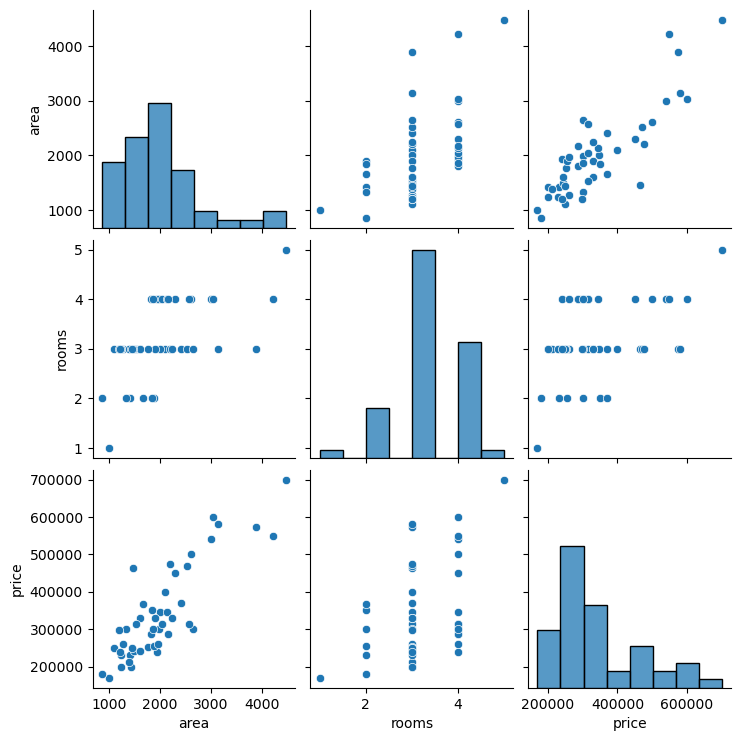

In [17]:
sns.pairplot(data)

In [18]:
data.isna().sum()

area     0
rooms    0
price    0
dtype: int64

In [19]:
objcol=data.select_dtypes(include = 'object')

In [20]:
for i in objcol:
    data[i] = data[i].map({'yes':1 ,'no':0})

In [21]:
data.head()

,area,rooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [24]:
x=data.iloc[:,:2]
x.head()

,area,rooms
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


In [61]:
x.shape

(47, 4)

In [25]:
y=data.iloc[:,-1:]
y.head()

,price
0,399900
1,329900
2,369000
3,232000
4,539900


In [26]:
import sklearn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=2)

In [27]:
print(xtrain.shape)
print()
print(ytrain.shape)
print()
print(xtest.shape)
print()
print(ytest.shape)

(37, 2)

(37, 1)

(10, 2)

(10, 1)


In [30]:
model = Sequential()
model.add(Dense(11, input_shape=(2,), kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 11)                33        
                                                                 
 dense_7 (Dense)             (None, 1)                 12        
                                                                 
Total params: 45 (180.00 Byte)
Trainable params: 45 (180.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])
model.fit(xtrain, ytrain, epochs=30)

Epoch 1/30
2/2 [==============================] - 1s 5ms/step - loss: 130854805504.0000 - mean_squared_error: 130854805504.0000
Epoch 2/30
2/2 [==============================] - 0s 8ms/step - loss: 130854150144.0000 - mean_squared_error: 130854150144.0000
Epoch 3/30
2/2 [==============================] - 0s 6ms/step - loss: 130853552128.0000 - mean_squared_error: 130853552128.0000
Epoch 4/30
2/2 [==============================] - 0s 7ms/step - loss: 130852978688.0000 - mean_squared_error: 130852978688.0000
Epoch 5/30
2/2 [==============================] - 0s 5ms/step - loss: 130852421632.0000 - mean_squared_error: 130852421632.0000
Epoch 6/30
2/2 [==============================] - 0s 8ms/step - loss: 130851897344.0000 - mean_squared_error: 130851897344.0000
Epoch 7/30
2/2 [==============================] - 0s 8ms/step - loss: 130851405824.0000 - mean_squared_error: 130851405824.0000
Epoch 8/30
2/2 [==============================] - 0s 10ms/step - loss: 130850930688.0000 - mean_squared_

In [32]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt

pred= model.predict(xtest)
print(np.sqrt(mean_squared_error(ytest,pred)))
print(r2_score(ytest,pred))

1/1 [==============================] - 0s 59ms/step
363863.8959405187
-7.289109029117165
